|$^{i-1}T_i$|i|$a_i$|$\alpha_i$|$d_i$|$\theta_i$|
|---|---|---|---|---|---|
|$^{B}T_1$  |1|0    |0         |0    |$\theta_1$|
|$^{1}T_2$  |2|1    |0         |0    |$\theta_2$|
|$^{2}T_E$  |3|1    |0         |0    |0         |

\begin{align*}
^{i-1}T_i
&=&
\begin{bmatrix}
& a_{i-1} \\
I & 0 \\
& 0 \\
O^{T} & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & C_{\alpha_{i-1}} & -S_{\alpha_{i-1}} & 0 \\
0 & S_{\alpha_{i-1}} & C_{\alpha_{i-1}} & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
& 0 \\
I & 0 \\
& d_i \\
O^{T} & 1
\end{bmatrix}
\begin{bmatrix}
C_{\theta_i} & -S_{\theta_i} & 0 & 0 \\
S_{\theta_i} & C_{\theta_i} & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} \\
&=&
\begin{bmatrix}
C_{\theta_i} & -S_{\theta_i} & 0 & a_{i-1} \\
C_{\alpha_{i-1}}S_{\theta_i} & C_{\alpha_{i-1}}C_{\theta_i} & -S_{\alpha_{i-1}} & -S_{\alpha_{i-1}}d_i \\
S_{\alpha_{i-1}}S_{\theta_i} & S_{\alpha_{i-1}}C_{\theta_i} & C_{\alpha_{i-1}} & C_{\alpha_{i-1}}d_i \\
0 & 0 & 0 & 1
\end{bmatrix}
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trans_m(a, alpha, d, theta):
    m = np.array([[np.cos(theta), -np.sin(theta), 0, a],
                  [np.cos(alpha)*np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha), -np.sin(alpha)*d],
                  [np.sin(alpha)*np.sin(theta), np.sin(alpha)*np.cos(theta),  np.cos(alpha),  np.cos(alpha)*d],
                  [0, 0, 0, 1]])
    return m

In [3]:
theta = [np.pi/6, np.pi/2]
tm0_1 = trans_m(0, 0, 0, theta[0])
tm1_2 = trans_m(1, 0, 0, theta[1])
tm2_3 = trans_m(1, 0, 0, 0)
pos = [tm0_1[0:2,3:4],
       tm0_1.dot(tm1_2)[0:2,3:4],
       tm0_1.dot(tm1_2).dot(tm2_3)[0:2,3:4]]

In [4]:
def draw(pos):
    # グラフの設定
    fig = plt.figure(figsize=(5,5))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    xs = [e[0] for e in pos]
    ys = [e[1] for e in pos]
    plt.plot(xs, ys,"-", color="skyblue", lw=5, label="link")
    plt.plot(xs, ys,"o", color="orange", ms=10, label="joint")
    plt.grid()
    plt.legend(fontsize=20)
    plt.show()

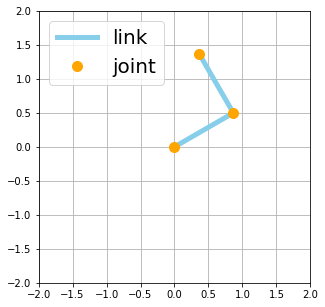

In [5]:
draw(pos)